In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
#Age, Cabin, Embarked as null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

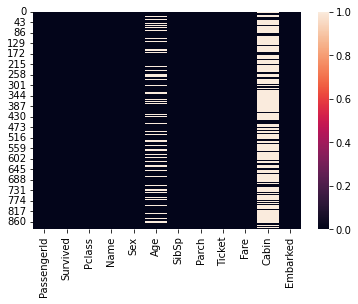

In [5]:
sns.heatmap(df.isnull())
#Heatmap of null values
#Age and Cabin has the most null values

<AxesSubplot:>

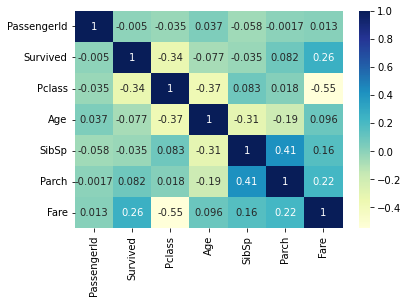

In [6]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
#Passenger ID has no correlation with survival, as expected
#P

<AxesSubplot:xlabel='Sex', ylabel='count'>

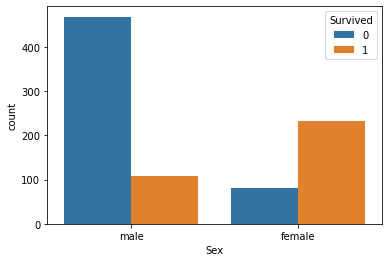

In [7]:
sns.countplot(x=df["Sex"],hue=df["Survived"])
#Most of the male passengers have deceased 
#Most of the femanle passengers have survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

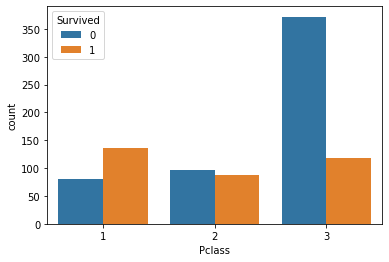

In [8]:
sns.countplot(x=df["Pclass"],hue=df["Survived"])
#Comparitively 1st class passengers have survived more
#2nd class passengers have survived 50-50 approximately
#Most of the 3rd class passengers have deceased

<AxesSubplot:xlabel='Embarked', ylabel='count'>

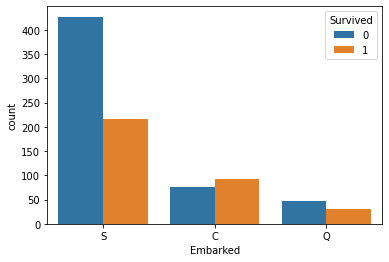

In [9]:
sns.countplot(x=df["Embarked"],hue=df["Survived"])
#Post of departure --> C = Cherbourg, Q = Queenstown, S = Southampton
#Maximum number of passengers have embarked from Soutampton and most of them have deceased
#More than half of the passengers that embarked from Cherbourg have survived
#Most of the passengers from Queenstown have deceased

D:\DSE\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

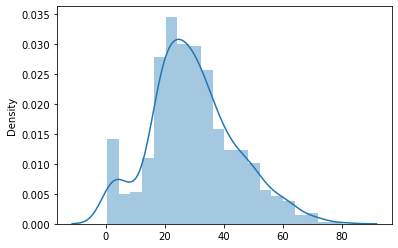

In [10]:
sns.distplot(x=df["Age"].dropna())
#NA values are not included in this graph --> dropna()
#Age of the passengers is normally distributed

<AxesSubplot:xlabel='SibSp', ylabel='count'>

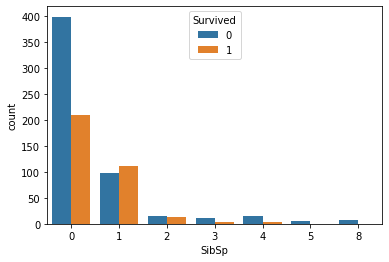

In [11]:
sns.countplot(x=df["SibSp"],hue=df["Survived"])
#Comparitvely, passengers without a spouse or children have mostly survived

D:\DSE\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

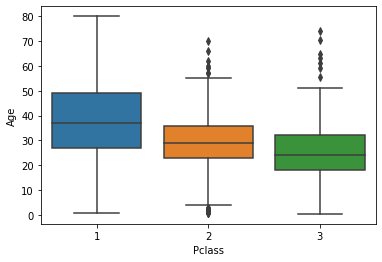

In [12]:
sns.boxplot(df["Pclass"],df["Age"])
# 1st class passengers are aged at average of ~37 years
# 2nd class passengers are aged at average of ~29 years
# 3rd class passengers are aged at average of ~24 years
# These average age values can be used to replace the null values in age

In [13]:
def replace_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
        

In [14]:
df["Age"]=df[["Age","Pclass"]].apply(replace_age,axis=1)
# Function replace_age() is called to replace the null values in Age column

<AxesSubplot:>

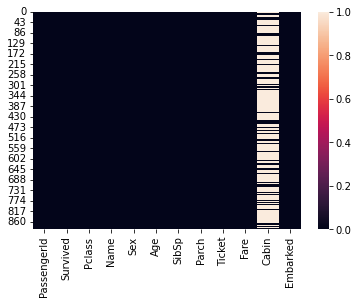

In [15]:
sns.heatmap(df.isnull())
#No null values are present in Age column now

In [16]:
df.drop("Cabin",axis=1,inplace=True)
# Cabin column is dropped as it has null values and doesnt add significance to the dataset

<AxesSubplot:>

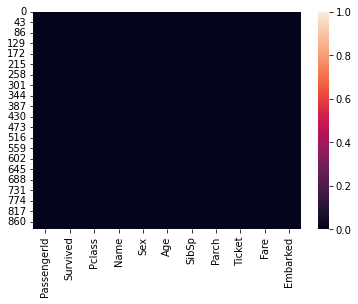

In [17]:
sns.heatmap(df.isnull())
# No null values are present now

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
Sex_Cat=pd.get_dummies(df["Sex"])

In [20]:
Sex_Cat

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
Embark_Cat=pd.get_dummies(df["Embarked"])

In [22]:
Embark_Cat

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [23]:
df=pd.concat([df,Sex_Cat,Embark_Cat],axis=1)
# New columns are appended to the existing dataframe

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


In [25]:
df.drop(["Name","Ticket","Sex","Embarked"],axis=1,inplace=True)
# Name and Ticket column can be dropped as it doesnt not add any significance
# Sex and Embarked columns are dropped as we have replaced them with numerical values

In [26]:
df.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [27]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Building the model using Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size=0.3,random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel=LogisticRegression()


In [32]:
logmodel.fit(X_train,y_train)

D:\DSE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions=logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
accuracy = confusion_matrix(y_test,predictions)

In [36]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,predictions)

In [39]:
accuracy

0.7686567164179104

In [42]:
res=pd.DataFrame(predictions)

In [43]:
res.to_csv("prediction_results.csv")